In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import collections
#import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load behavioral data

In [2]:
df = pd.read_csv("/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/Behavior/HCP_behavioralData.csv")
df.shape
df.head()

(1206, 582)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


# Exclude missing values from the data

In [3]:
#Detect missing values in the data
#How many Nulls for each field?
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
type(null_columns)

dMRI_3T_ReconVrs         141
fMRI_3T_ReconVrs         108
7T_fMRI_Mov_Vrs         1022
QC_Issue                1049
MRsession_Scanner_3T      93
                        ... 
Taste_Unadj                6
Taste_AgeAdj               6
Mars_Log_Score             8
Mars_Errs                 11
Mars_Final                11
Length: 470, dtype: int64

pandas.core.indexes.base.Index

In [4]:
#Delete rows with missing values in specific columns
df = df.dropna(subset=['DDisc_AUC_200', 'DDisc_AUC_40K', 'Flanker_AgeAdj', 'Mars_Final', 'CardSort_AgeAdj', 'PicSeq_AgeAdj'])
df.shape

(1191, 582)

# Exploration of the behavioral tasks

## Perceptual task - Mars contrast test

count    1191.000000
mean        1.822427
std         0.543786
min         1.080000
25%         1.760000
50%         1.800000
75%         1.840000
max        15.000000
Name: Mars_Final, dtype: float64

<AxesSubplot:xlabel='Mars_Final'>

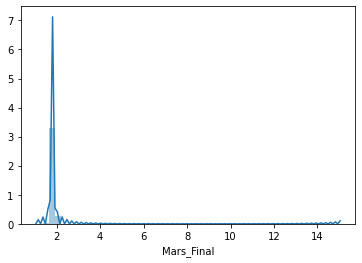

In [5]:
df['Mars_Final'].describe()

sns.distplot(df['Mars_Final'])

In [6]:
#z-score
df['z_score_mars'] = stats.zscore(df['Mars_Final'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_mars'].abs()<=3]
df.describe

<bound method NDFrame.describe of       Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
0      100004    S900         Q06      M  22-25             False         0   
1      100206    S900         Q11      M  26-30              True         1   
2      100307      Q1         Q01      F  26-30              True         1   
3      100408      Q3         Q03      M  31-35              True         1   
4      100610    S900         Q08      M  26-30              True         2   
...       ...     ...         ...    ...    ...               ...       ...   
1201   992774      Q2         Q02      M  31-35              True         2   
1202   993675    S900         Q09      F  26-30              True         2   
1203   994273    S500         Q06      M  26-30              True         1   
1204   995174   S1200         Q13      M  22-25             False         1   
1205   996782    S900         Q08      F  26-30              True         2   

      T2_Count  3

<AxesSubplot:xlabel='z_score_mars'>

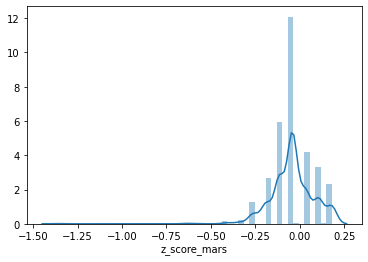

In [7]:
sns.distplot(df['z_score_mars'])

## Value-based task - delay discounting

count    1189.000000
mean        0.257696
std         0.205062
min         0.015692
25%         0.104884
50%         0.199546
75%         0.345770
max         0.984442
Name: DDisc_AUC_200, dtype: float64

<AxesSubplot:xlabel='DDisc_AUC_200'>

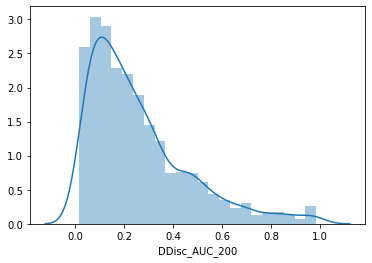

In [8]:
df['DDisc_AUC_200'].describe()

sns.distplot(df['DDisc_AUC_200'])

In [9]:
#z-score
df['z_score_DDisc_AUC'] = stats.zscore(df['DDisc_AUC_40K'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_DDisc_AUC'].abs()<=3]
df.describe

<bound method NDFrame.describe of       Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
0      100004    S900         Q06      M  22-25             False         0   
1      100206    S900         Q11      M  26-30              True         1   
2      100307      Q1         Q01      F  26-30              True         1   
3      100408      Q3         Q03      M  31-35              True         1   
4      100610    S900         Q08      M  26-30              True         2   
...       ...     ...         ...    ...    ...               ...       ...   
1201   992774      Q2         Q02      M  31-35              True         2   
1202   993675    S900         Q09      F  26-30              True         2   
1203   994273    S500         Q06      M  26-30              True         1   
1204   995174   S1200         Q13      M  22-25             False         1   
1205   996782    S900         Q08      F  26-30              True         2   

      T2_Count  3

<AxesSubplot:xlabel='z_score_DDisc_AUC'>

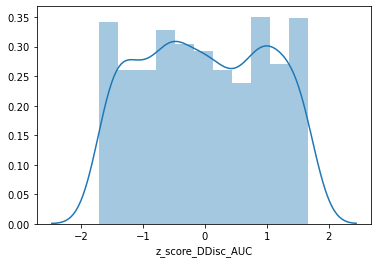

In [10]:
sns.distplot(df['z_score_DDisc_AUC'])

## Perceptual decision-making/selective attention - Flanker task

count    1189.000000
mean      101.406686
std        10.125334
min        69.310000
25%        94.780000
50%       101.610000
75%       108.920000
max       123.560000
Name: Flanker_AgeAdj, dtype: float64

<AxesSubplot:xlabel='Flanker_AgeAdj'>

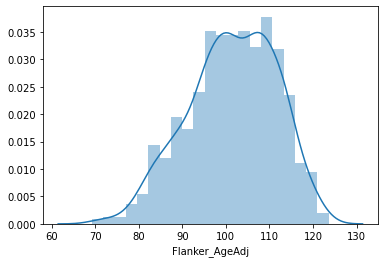

In [11]:
df['Flanker_AgeAdj'].describe()

#Scores distribution
sns.distplot(df['Flanker_AgeAdj'])

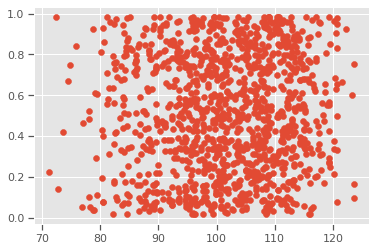

<AxesSubplot:xlabel='Flanker_AgeAdj', ylabel='DDisc_AUC_40K'>

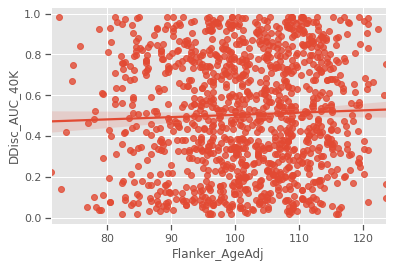

In [39]:
#Correlation between Flanker task and CardSort task
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['Flanker_AgeAdj']
y = df['DDisc_AUC_40K']

#sc.stats.pearsonr(x, y)

plt.scatter(x, y)
plt.show()

sns.regplot(x, y)

In [40]:
sc.stats.pearsonr(x, y)

(0.0389052702467292, 0.18151785690644767)

In [13]:
#z-score
df['z_score_Flanker'] = stats.zscore(df['Flanker_AgeAdj'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_Flanker'].abs()<=3]
df.describe

<bound method NDFrame.describe of       Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
0      100004    S900         Q06      M  22-25             False         0   
1      100206    S900         Q11      M  26-30              True         1   
2      100307      Q1         Q01      F  26-30              True         1   
3      100408      Q3         Q03      M  31-35              True         1   
4      100610    S900         Q08      M  26-30              True         2   
...       ...     ...         ...    ...    ...               ...       ...   
1201   992774      Q2         Q02      M  31-35              True         2   
1202   993675    S900         Q09      F  26-30              True         2   
1203   994273    S500         Q06      M  26-30              True         1   
1204   995174   S1200         Q13      M  22-25             False         1   
1205   996782    S900         Q08      F  26-30              True         2   

      T2_Count  3

<AxesSubplot:xlabel='z_score_Flanker'>

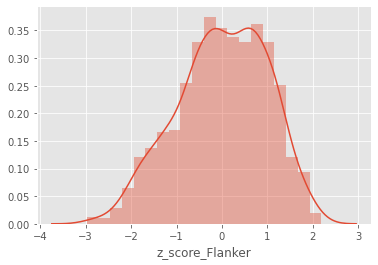

In [14]:
sns.distplot(df['z_score_Flanker'])

# Selective attention/Executive Function/Cognitive Flexibility - CardSort task

count    1187.000000
mean      101.972216
std         9.997156
min        55.390000
25%        95.280000
50%       101.910000
75%       109.645000
max       122.650000
Name: CardSort_AgeAdj, dtype: float64

<AxesSubplot:xlabel='CardSort_AgeAdj'>

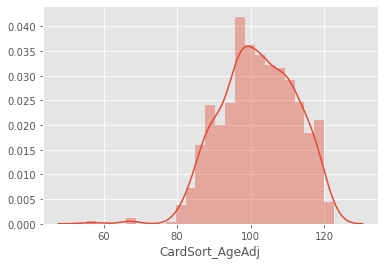

In [15]:
df['CardSort_AgeAdj'].describe()

#Scores distribution
sns.distplot(df['CardSort_AgeAdj'])

<AxesSubplot:xlabel='Flanker_AgeAdj', ylabel='CardSort_AgeAdj'>

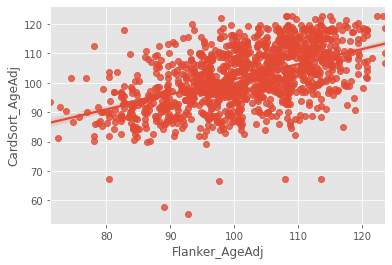

In [16]:
#Correlation between Flanker task and CardSort task
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['Flanker_AgeAdj']
y = df['CardSort_AgeAdj']

#sc.stats.pearsonr(x, y)
sns.regplot(x, y)

In [17]:
#z-score
df['z_score_CardSort'] = stats.zscore(df['CardSort_AgeAdj'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_CardSort'].abs()<=3]
df.describe

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<bound method NDFrame.describe of       Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
0      100004    S900         Q06      M  22-25             False         0   
1      100206    S900         Q11      M  26-30              True         1   
2      100307      Q1         Q01      F  26-30              True         1   
3      100408      Q3         Q03      M  31-35              True         1   
4      100610    S900         Q08      M  26-30              True         2   
...       ...     ...         ...    ...    ...               ...       ...   
1201   992774      Q2         Q02      M  31-35              True         2   
1202   993675    S900         Q09      F  26-30              True         2   
1203   994273    S500         Q06      M  26-30              True         1   
1204   995174   S1200         Q13      M  22-25             False         1   
1205   996782    S900         Q08      F  26-30              True         2   

      T2_Count  3

<AxesSubplot:xlabel='z_score_CardSort'>

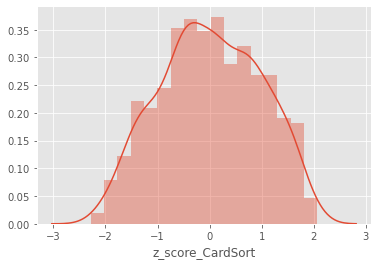

In [18]:
sns.distplot(df['z_score_CardSort'])

## Comparison between z_scores of Mars Contrast and Delay discount

In [19]:
#correlation
x = df['z_score_DDisc_AUC']
y = df['z_score_mars']
sc.stats.pearsonr(x, y)

(0.07300283589582708, 0.012090754061923682)

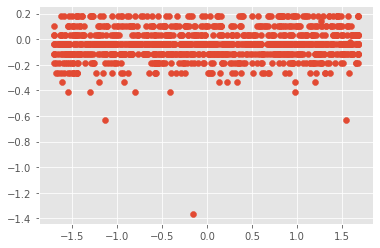

In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['z_score_DDisc_AUC']
y = df['z_score_mars']

#sc.stats.pearsonr(x, y)

plt.scatter(x, y)
plt.show()

In [21]:
#Devide the subjects into 4 groups according to the z-scores in both variables
df['GroupType'] = ""

for index, row in df.iterrows():
    if row['z_score_mars'] < 0.0 and row['z_score_DDisc_AUC'] < 0.0:
        df['GroupType'][index] = 0
        #print(row)
    elif row['z_score_mars'] < 0 and row['z_score_DDisc_AUC'] > 0:
        df['GroupType'][index] = 1
    elif row['z_score_mars'] >= 0 and row['z_score_DDisc_AUC'] >= 0:
        df['GroupType'][index] = 2
    elif row['z_score_mars'] >= 0 and row['z_score_DDisc_AUC'] <= 0:
        df['GroupType'][index]= 3

df['GroupType'].unique()



/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lizakson/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

array([0, 3, 2, 1], dtype=object)

In [22]:
#validate if the classification to groups is correct
df.head(10)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,z_score_Flanker,z_score_CardSort,GroupType
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,107.17,105.31,1.80,0.0,1.80,-0.041259,-1.521743,0.948843,-1.334163,0
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,72.63,72.03,1.84,0.0,1.84,0.032330,-1.582579,1.496216,0.296988,3
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,71.69,71.76,1.76,0.0,1.76,-0.114848,-0.670943,0.048741,0.795340,0
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,114.01,113.59,1.76,2.0,1.68,-0.262027,-0.287765,1.195853,-0.120306,0
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,84.84,85.31,1.92,1.0,1.88,0.105920,1.272186,1.262051,1.321711,2
5,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,123.80,123.31,1.80,0.0,1.80,-0.041259,0.973453,-0.896810,-0.767763,1
6,101107,S500,Q06,M,22-25,True,2,2,4,100.0,...,134.65,131.38,1.84,0.0,1.84,0.032330,0.280646,-0.515428,0.372041,2
7,101208,S1200,Q12,F,31-35,False,0,0,0,0.0,...,105.57,102.32,1.92,0.0,1.92,0.179509,1.095125,-1.674396,-1.954601,2
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,106.39,104.39,1.80,0.0,1.80,-0.041259,1.554576,0.193983,-1.595347,1
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,73.86,71.78,1.80,0.0,1.80,-0.041259,-0.580597,-0.081680,0.487122,0


GroupType
0    101.637535
1    101.269139
2    102.448298
3    100.538663
Name: Flanker_AgeAdj, dtype: float64


<AxesSubplot:xlabel='GroupType'>

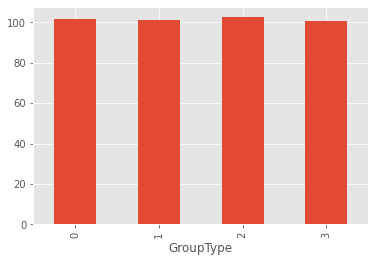

In [23]:
#Show performance in Flanker task according to the 4 groups
FT = df.groupby(['GroupType'])['Flanker_AgeAdj'].mean()
print(FT)
FT.plot(kind='bar')

In [24]:
#from: https://www.pythonfordatascience.org/anova-python/
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Flanker_AgeAdj ~ C(GroupType)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(GroupType),356.802422,3.0,1.180767,0.315805
Residual,118554.718267,1177.0,NaN,NaN


In [25]:
#Create a coloumn that compares between the two z-scores
#df['z_score_compare'] = df['z_score_mars']-df['z_score_DD200']

df['z_score_compare'] = ""

for index, row in df.iterrows():
    df['z_score_compare'][index] = abs(row['z_score_mars'] - row['z_score_DDisc_AUC'])
    
df['z_score_compare']

df.head()

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/lizakson/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

0         1.48048
1         1.61491
2        0.556095
3       0.0257385
4         1.16627
          ...    
1201      1.57397
1202      1.62947
1203     0.203905
1204     0.539338
1205     0.465376
Name: z_score_compare, Length: 1181, dtype: object

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,z_score_Flanker,z_score_CardSort,GroupType,z_score_compare
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,105.31,1.80,0.0,1.80,-0.041259,-1.521743,0.948843,-1.334163,0,1.48048
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,72.03,1.84,0.0,1.84,0.032330,-1.582579,1.496216,0.296988,3,1.61491
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,71.76,1.76,0.0,1.76,-0.114848,-0.670943,0.048741,0.795340,0,0.556095
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,113.59,1.76,2.0,1.68,-0.262027,-0.287765,1.195853,-0.120306,0,0.0257385
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,85.31,1.92,1.0,1.88,0.105920,1.272186,1.262051,1.321711,2,1.16627


In [26]:
import matplotlib
import matplotlib.pyplot as plt

x = df['Flanker_AgeAdj']
y = df['z_score_compare']

#sns.regplot(x, y)

In [27]:
#correlation

sc.stats.pearsonr(x, y)

(-0.0417023387410457, 0.15207666202835435)

count     1181.000000
unique    1107.000000
top          1.716599
freq         9.000000
Name: z_score_compare, dtype: float64

<AxesSubplot:xlabel='z_score_compare'>

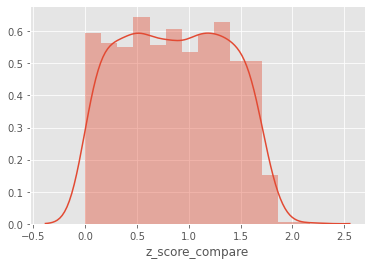

In [28]:
df['z_score_compare'].describe()

#Scores distribution
sns.distplot(df['z_score_compare'])

## Comparison between z_scores of Flanker task and Delay discount

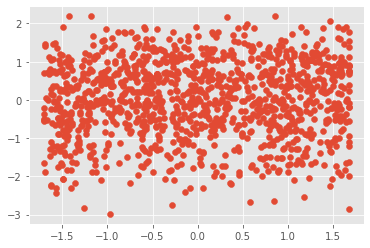

<AxesSubplot:xlabel='z_score_DDisc_AUC', ylabel='z_score_Flanker'>

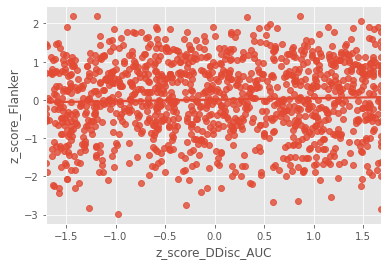

In [29]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['z_score_DDisc_AUC']
y = df['z_score_Flanker']

#sc.stats.pearsonr(x, y)

plt.scatter(x, y)
plt.show()

sns.regplot(x, y)

In [30]:
sc.stats.pearsonr(x, y)

(0.038905270246729226, 0.18151785690644767)

In [31]:
#Devide the subjects into 4 groups according to the z-scores in both variables
df['GroupType_f'] = ""

for index, row in df.iterrows():
    if row['z_score_Flanker'] < 0.0 and row['z_score_DDisc_AUC'] < 0.0:
        df['GroupType_f'][index] = 0
        #print(row)
    elif row['z_score_Flanker'] < 0 and row['z_score_DDisc_AUC'] > 0:
        df['GroupType_f'][index] = 1
    elif row['z_score_Flanker'] >= 0 and row['z_score_DDisc_AUC'] >= 0:
        df['GroupType_f'][index] = 2
    elif row['z_score_Flanker'] >= 0 and row['z_score_DDisc_AUC'] <= 0:
        df['GroupType_f'][index]= 3

df['GroupType_f'].unique()

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/lizakson/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

array([3, 2, 1, 0], dtype=object)

In [32]:
#validate if the classification to groups is correct
df.head(10)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,z_score_Flanker,z_score_CardSort,GroupType,z_score_compare,GroupType_f
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,1.80,0.0,1.80,-0.041259,-1.521743,0.948843,-1.334163,0,1.48048,3
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,1.84,0.0,1.84,0.032330,-1.582579,1.496216,0.296988,3,1.61491,3
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,1.76,0.0,1.76,-0.114848,-0.670943,0.048741,0.795340,0,0.556095,3
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,1.76,2.0,1.68,-0.262027,-0.287765,1.195853,-0.120306,0,0.0257385,3
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,1.92,1.0,1.88,0.105920,1.272186,1.262051,1.321711,2,1.16627,2
5,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,1.80,0.0,1.80,-0.041259,0.973453,-0.896810,-0.767763,1,1.01471,1
6,101107,S500,Q06,M,22-25,True,2,2,4,100.0,...,1.84,0.0,1.84,0.032330,0.280646,-0.515428,0.372041,2,0.248315,1
7,101208,S1200,Q12,F,31-35,False,0,0,0,0.0,...,1.92,0.0,1.92,0.179509,1.095125,-1.674396,-1.954601,2,0.915616,1
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,1.80,0.0,1.80,-0.041259,1.554576,0.193983,-1.595347,1,1.59583,2
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,1.80,0.0,1.80,-0.041259,-0.580597,-0.081680,0.487122,0,0.539338,0


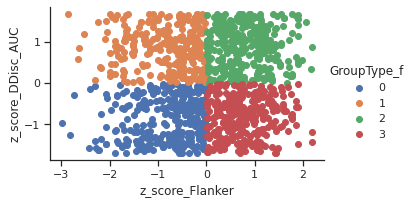

In [33]:
#Plot the classification
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=df, hue='GroupType_f', aspect=1.61)
fg.map(pyplot.scatter, 'z_score_Flanker', 'z_score_DDisc_AUC').add_legend()

In [34]:
#Create a coloumn that compares between the two z-scores
#df['z_score_compare'] = df['z_score_mars']-df['z_score_DD200']

df['z_score_compare_f'] = ""

for index, row in df.iterrows():
    df['z_score_compare_f'][index] = abs(row['z_score_Flanker'] - row['z_score_DDisc_AUC'])
    
df['z_score_compare_f']

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/lizakson/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

0         2.47059
1          3.0788
2        0.719684
3         1.48362
4       0.0101353
          ...    
1201      3.11093
1202      1.01534
1203      1.26488
1204      0.75589
1205     0.605054
Name: z_score_compare_f, Length: 1181, dtype: object

count     1181.000000
unique    1179.000000
top          0.929045
freq         2.000000
Name: z_score_compare_f, dtype: float64

<AxesSubplot:xlabel='z_score_compare_f'>

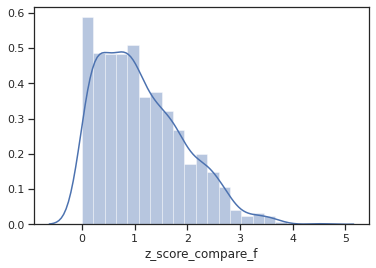

In [35]:
df['z_score_compare_f'].describe()

#Scores distribution
sns.distplot(df['z_score_compare_f'])

In [36]:
#Save to csv
df.to_csv('HCP_behavior_includeZscores_V2.csv')